# **주요 내용**

*   실험

In [1]:
notebookName = "20200515"
notebookName

'20200515'

In [2]:
import tensorflow as tf
tf.__version__

'2.2.0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 10446745202017847862, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12007872618065389855
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 15343560554211446436
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16027256773766743889
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [4]:
import platform
platform.platform()

'Linux-4.19.104+-x86_64-with-Ubuntu-18.04-bionic'

In [5]:
!nvidia-smi

Fri May 15 03:27:44 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    33W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


**파일 압축 해제 (드라이브에는 *.zip 파일 형식으로 저장되어 있음)**

In [7]:
import os

pcm_path = "./pcm_dataset"
wav_path = "./wav_dataset"

# mkdir
if not os.path.exists(pcm_path):
    os.mkdir(pcm_path)

if not os.path.exists(wav_path):
    os.mkdir(wav_path)

# unzip with quite mode (-q options)
!unzip -q "/content/drive/My Drive/ETRI/9_voice_download_4_Korean_English_by_Korean_part2.zip" -d "./pcm_dataset"

print(os.listdir(pcm_path)[:5])
print(len(os.listdir(pcm_path)))

['GSM09752SCY0', 'GSM02544LHS0', 'GSM03321SDK0', 'I4F02631KSM0', 'GSF03732JJH0']
50


***.pcm to *.wav**

In [8]:
import wave

for i, folder_path in enumerate(sorted(os.listdir(pcm_path))): # sorted!!!
    print("{}\t{}".format(i, folder_path))

    file_list = os.listdir(os.path.join(pcm_path, folder_path)) # label's path
    file_list_pcm = [files for files in file_list if files.endswith(".pcm")] # *.pcm files

    for j, file_path in enumerate(sorted(file_list_pcm)): # sorted!!!
        with open(os.path.join(pcm_path, folder_path, file_path), "rb") as pcm_file:
            pcm_data = pcm_file.read()
        # save as {label}_{features}.wav format
        with wave.open(os.path.join(wav_path, "{}_{}.wav".format(i, j)), 'wb') as wav_file:
            wav_file.setparams((1, 2, 16000, 0, 'NONE', 'NONE')) # 16kHz, mono channel
            wav_file.writeframes(pcm_data)

0	GSF03031LJH0
1	GSF03732JJH0
2	GSF04122LHK0
3	GSF04524CJI0
4	GSF04623LWJ0
5	GSF04923PEY0
6	GSF05134JHK0
7	GSF05432KSY0
8	GSF05733HBH0
9	GSF05844LJR0
10	GSF06654KES0
11	GSF06742CKA0
12	GSF06833JYK0
13	GSF06934SYN0
14	GSF07132LCY0
15	GSF08142LDH0
16	GSF08233NEH0
17	GSF08333KJH0
18	GSF09025WYY0
19	GSF09431SHY0
20	GSF09844KKS0
21	GSM02434AGS0
22	GSM02544LHS0
23	GSM03224CHD0
24	GSM03321SDK0
25	GSM03634SJY0
26	GSM03823YJK0
27	GSM04233KMS0
28	GSM04424JBRC
29	GSM05953CJH0
30	GSM06044JBY0
31	GSM06235BJH0
32	GSM07042NSK0
33	GSM07355MIW0
34	GSM09534JHD0
35	GSM09644KCK0
36	GSM09752SCY0
37	I4F02224SDY0
38	I4F02631KSM0
39	I4F02821YRR0
40	I4F02933JSI0
41	I4F03423KSR0
42	I4F03543KSY0
43	I4F03922LKY0
44	I4F04732OIY0
45	I4F05332CJH0
46	I4F05625JSY0
47	I4F07443LJA0
48	I4F07633JSI0
49	I4F07852PKJ0


In [0]:
import numpy as np

num_labels = 50
num_features = 100
data_length = 3 ** 8   # 19,683

train_rate = 0.8
num_train_data = int(num_features * train_rate) # 80

select_train_data = [True] * num_train_data + [False] * (num_features - num_train_data)
select_test_data = [False] * num_train_data + [True] * (num_features - num_train_data)

# naming
save_train_data_name = 'train_data'
save_train_labels_name = 'train_labels'

save_test_data_name = 'test_data'
save_test_labels_name = 'test_labels'

**train data, test data로 구분하여 numpy 저장 (*.npz)**

In [12]:
# save features as *.npz format

from scipy.io import wavfile

data = np.zeros((num_labels * num_features, data_length))
labels = np.zeros((num_labels * num_features))

for i in range(num_labels):
    for j in range(num_features):
        file_name = "{}_{}.wav".format(i, j)
        sample_rate, samples = wavfile.read(os.path.join(wav_path, file_name))
        
        start = int(len(samples) - data_length) // 2
        end = start + data_length
        
        data[i * num_features + j] = samples[start:end]
        labels[i * num_features + j] = i

train_data = data[select_train_data * num_labels]
train_labels = labels[select_train_data * num_labels]

test_data = data[select_test_data * num_labels]
test_labels = labels[select_test_data * num_labels]

# save *.npy        
np.save("./" + save_train_data_name, train_data)
np.save("./" + save_train_labels_name, train_labels)

np.save("./" + save_test_data_name, test_data)
np.save("./" + save_test_labels_name, test_labels)

print("train_data.shape: {}, train_labels.shape: {}".format(train_data.shape, train_labels.shape))
print("test_data.shape: {}, test_labels.shape: {}".format(test_data.shape, test_labels.shape))

train_data.shape: (4000, 6561), train_labels.shape: (4000,)
test_data.shape: (1000, 6561), test_labels.shape: (1000,)


**train data, validation data 분할 및 전처리 (normalization)**

In [0]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# def split(train_data, train_labels):
#     test_size = 0.2

#     X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size = test_size)

#     x_train = X_train.reshape(len(X_train), data_length, 1)
#     x_val = X_val.reshape(len(X_val), data_length, 1) 

#     y_train = to_categorical(Y_train)
#     y_val = to_categorical(Y_val)

#     # standarization
#     mean = x_train.mean()
#     x_train -= mean
#     std = x_train.std()
#     x_train /= std

#     x_val -= mean
#     x_val /= std

#     return x_train, y_train, x_val, y_val, mean, std


test_size = 0.2

X_train, X_val, Y_train, Y_val = train_test_split(train_data, train_labels, test_size = test_size)

x_train = X_train.reshape(len(X_train), data_length, 1)
x_val = X_val.reshape(len(X_val), data_length, 1) 

y_train = to_categorical(Y_train)
y_val = to_categorical(Y_val)

# standarization
mean = x_train.mean()
x_train -= mean
std = x_train.std()
x_train /= std

x_val -= mean
x_val /= std

**Build Model**

In [0]:
from tensorflow.keras.models import Model
from tensorflow.keras import layers, Input

model_input = Input(shape = (data_length, 1))

In [0]:
def build_model_1(model_input):
    # block 1
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(model_input)
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 2
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 3
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 4
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out)
    return model

In [0]:
def build_model_2(model_input):
    x = layers.Conv1D(filters = 1, kernel_size = 2, strides = 1, padding = "same")(model_input)
    x = layers.Add()([model_input, x])

    # block 1
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 2
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 3
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 4
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out)
    return model

In [0]:
def build_model_3(model_input):
    x = layers.Conv1D(filters = 1, kernel_size = 2, strides = 1, padding = "same")(model_input)
    x = layers.Concatenate(axis = -1)([model_input, x])

    # block 1
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 2
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 3
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 4
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out)
    return model

In [0]:
def build_model_4(model_input):
    x = layers.Conv1D(filters = 1, kernel_size = 2, strides = 1, padding = "same")(model_input)
    x = layers.Concatenate(axis = -1)([model_input, x])

    # block 1
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 32, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 2
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 64, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 3
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 128, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    # block 4
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.Conv1D(filters = 256, kernel_size = 3, strides = 1, padding = "same")(x)
    x = layers.ReLU()(x)
    x = layers.MaxPooling1D(pool_size = 3)(x)
    x = layers.BatchNormalization()(x)

    x = layers.GlobalAveragePooling1D()(x)
    out = layers.Dense(num_labels, activation = 'softmax')(x)

    model = Model(model_input, out)

    # initialize
    w = model.layers[1].get_weights()[0] # weight
    b = model.layers[1].get_weights()[1] # bias

    w[0][0][0] = -1
    w[1][0][0] = 1.

    b[0] = 0.

    model.layers[1].set_weights([w, b])

    return model

In [0]:
model_1 = build_model_1(model_input)

In [65]:
model_1.summary()

Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 6561, 1)]         0         
_________________________________________________________________
conv1d_127 (Conv1D)          (None, 6561, 32)          128       
_________________________________________________________________
conv1d_128 (Conv1D)          (None, 6561, 32)          3104      
_________________________________________________________________
re_lu_4 (ReLU)               (None, 6561, 32)          0         
_________________________________________________________________
max_pooling1d_63 (MaxPooling (None, 2187, 32)          0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2187, 32)          128       
_________________________________________________________________
conv1d_129 (Conv1D)          (None, 2187, 64)          620

In [0]:
model_2 = build_model_2(model_input)
model_3 = build_model_3(model_input)
model_4 = build_model_4(model_input)

In [80]:
model_2.summary()

Model: "model_23"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_170 (Conv1D)             (None, 6561, 1)      3           input_11[0][0]                   
__________________________________________________________________________________________________
add_1 (Add)                     (None, 6561, 1)      0           input_11[0][0]                   
                                                                 conv1d_170[0][0]                 
__________________________________________________________________________________________________
conv1d_171 (Conv1D)             (None, 6561, 32)     128         add_1[0][0]               

In [81]:
model_3.summary()

Model: "model_24"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_179 (Conv1D)             (None, 6561, 1)      3           input_11[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 6561, 2)      0           input_11[0][0]                   
                                                                 conv1d_179[0][0]                 
__________________________________________________________________________________________________
conv1d_180 (Conv1D)             (None, 6561, 32)     224         concatenate_2[0][0]       

In [82]:
model_4.summary()

Model: "model_25"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 6561, 1)]    0                                            
__________________________________________________________________________________________________
conv1d_188 (Conv1D)             (None, 6561, 1)      3           input_11[0][0]                   
__________________________________________________________________________________________________
concatenate_3 (Concatenate)     (None, 6561, 2)      0           input_11[0][0]                   
                                                                 conv1d_188[0][0]                 
__________________________________________________________________________________________________
conv1d_189 (Conv1D)             (None, 6561, 32)     224         concatenate_3[0][0]       

**Train model**

In [0]:
import time

def compile_and_train(model, x_train, y_train, x_val, y_val, batch_size, epochs): 
    # compile
    model.compile(optimizer = 'rmsprop',
                  loss = 'categorical_crossentropy',
                  metrics = ['accuracy'])
    
    # train & validate
    print("Train on {} samples, validate on {} samples...".format(x_train.shape[0], x_val.shape[0]))

    start = time.time()
    print("[  start time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    history = model.fit(x_train, y_train,
                        validation_data = (x_val, y_val),
                        epochs = epochs,
                        batch_size = batch_size,
                        verbose = 0)
    end = time.time()
    print("[    end time] {}".format(time.strftime('%c', time.localtime(time.time()))))
    print("[working time] {:.2f} (sec)".format(end - start))

    # save model & results
    save_model_path = "/content/drive/My Drive/models"
    save_results_path = "/content/drive/My Drive/results"

    if not os.path.exists(save_model_path):     os.mkdir(save_model_path)
    if not os.path.exists(save_results_path):   os.mkdir(save_results_path)

    model.save(os.path.join(save_model_path, "{}_{}".format(notebookName, model.name)) + ".h5")
    np.savez_compressed(os.path.join(save_results_path,  "{}_{}".format(notebookName, model.name)),
                        accuracy = history.history['accuracy'],
                        val_accuracy = history.history['val_accuracy'],
                        loss = history.history['loss'],
                        val_loss = history.history['val_loss'])
    
    return history

In [66]:
batch_size = 64
epochs = 500

for i in range(1):
    # train test split
    # x_train, y_train, x_val, y_val, mean, std = split(train_data, train_labels)

    # build & compile & train model
    model_input = Input(shape = (data_length, 1))
    model_1 = build_model_1(model_input)

    history_1 = compile_and_train(model_1, x_train, y_train, x_val, y_val, batch_size, epochs)

    # test_data
    test_data = np.load(save_test_data_name + ".npy")
    test_labels = np.load(save_test_labels_name + ".npy")

    test_data = test_data.reshape(len(test_data), data_length, 1)
    test_labels = to_categorical(test_labels)

    # standarization
    test_data -= mean
    test_data /= std 

    # results
    results = model_1.evaluate(test_data, test_labels, batch_size = batch_size)
    print('test loss, test acc:', results)

    # weight & bias
    # print(model.layers[1].get_weights())

Train on 3200 samples, validate on 800 samples...
[  start time] Fri May 15 04:22:20 2020
[    end time] Fri May 15 04:36:33 2020
[working time] 852.53 (sec)
16/16 [==============================] - 0s 12ms/step - loss: 0.6616 - accuracy: 0.8710
test loss, test acc: [0.6616368889808655, 0.8709999918937683]


In [83]:
batch_size = 64
epochs = 500

for i in range(1):
    # train test split
    # x_train, y_train, x_val, y_val, mean, std = split(train_data, train_labels)

    # build & compile & train model
    model_input = Input(shape = (data_length, 1))
    model_2 = build_model_2(model_input)
    model_3 = build_model_3(model_input)
    model_4 = build_model_4(model_input)

    history_2 = compile_and_train(model_2, x_train, y_train, x_val, y_val, batch_size, epochs)
    history_3 = compile_and_train(model_3, x_train, y_train, x_val, y_val, batch_size, epochs)
    history_4 = compile_and_train(model_4, x_train, y_train, x_val, y_val, batch_size, epochs)

    # test_data
    test_data = np.load(save_test_data_name + ".npy")
    test_labels = np.load(save_test_labels_name + ".npy")

    test_data = test_data.reshape(len(test_data), data_length, 1)
    test_labels = to_categorical(test_labels)

    # standarization
    test_data -= mean
    test_data /= std 

    # results
    results_2 = model_2.evaluate(test_data, test_labels, batch_size = batch_size)
    print('test loss, test acc:', results_2)

    results_3 = model_2.evaluate(test_data, test_labels, batch_size = batch_size)
    print('test loss, test acc:', results_3)

    results_4 = model_2.evaluate(test_data, test_labels, batch_size = batch_size)
    print('test loss, test acc:', results_4)

    # weight & bias
    # print(model.layers[1].get_weights())

Train on 3200 samples, validate on 800 samples...
[  start time] Fri May 15 04:52:06 2020
[    end time] Fri May 15 05:06:48 2020
[working time] 881.91 (sec)
Train on 3200 samples, validate on 800 samples...
[  start time] Fri May 15 05:06:48 2020
[    end time] Fri May 15 05:21:34 2020
[working time] 886.65 (sec)
Train on 3200 samples, validate on 800 samples...
[  start time] Fri May 15 05:21:35 2020
[    end time] Fri May 15 05:36:21 2020
[working time] 886.45 (sec)
16/16 [==============================] - 0s 12ms/step - loss: 0.6626 - accuracy: 0.8900
test loss, test acc: [0.6626242995262146, 0.8899999856948853]
16/16 [==============================] - 0s 12ms/step - loss: 0.6626 - accuracy: 0.8900
test loss, test acc: [0.6626242995262146, 0.8899999856948853]
16/16 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.8900
test loss, test acc: [0.6626242995262146, 0.8899999856948853]


In [85]:
results_2 = model_2.evaluate(test_data, test_labels, batch_size = batch_size)
print('test loss, test acc:', results_2)

results_3 = model_3.evaluate(test_data, test_labels, batch_size = batch_size)
print('test loss, test acc:', results_3)

results_4 = model_4.evaluate(test_data, test_labels, batch_size = batch_size)
print('test loss, test acc:', results_4)

16/16 [==============================] - 0s 13ms/step - loss: 0.6626 - accuracy: 0.8900
test loss, test acc: [0.6626242995262146, 0.8899999856948853]
16/16 [==============================] - 0s 12ms/step - loss: 0.8634 - accuracy: 0.8600
test loss, test acc: [0.8634114861488342, 0.8600000143051147]
16/16 [==============================] - 0s 12ms/step - loss: 0.4489 - accuracy: 0.9190
test loss, test acc: [0.44889771938323975, 0.9190000295639038]


In [0]:
import matplotlib.pyplot as plt

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)

    # accuracy
    plt.subplot(1, 2, 1)

    plt.plot(np.arange(1, len(acc) + 1, 1), acc, 'bo', label = 'Training accuracy', ms = 4, alpha = .7)
    plt.plot(np.arange(1, len(val_acc) + 1, 1), val_acc, 'b', label = 'Validation accuracy', alpha = .7)
    plt.title('train and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.legend()

    # loss
    plt.subplot(1, 2, 2)

    plt.plot(np.arange(1, len(loss) + 1, 1), loss, 'bo', label = 'Training loss', ms = 4, alpha = .7)
    plt.plot(np.arange(1, len(val_loss) + 1, 1), val_loss, 'b', label = 'Validation loss', alpha = .7)
    plt.title('train and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

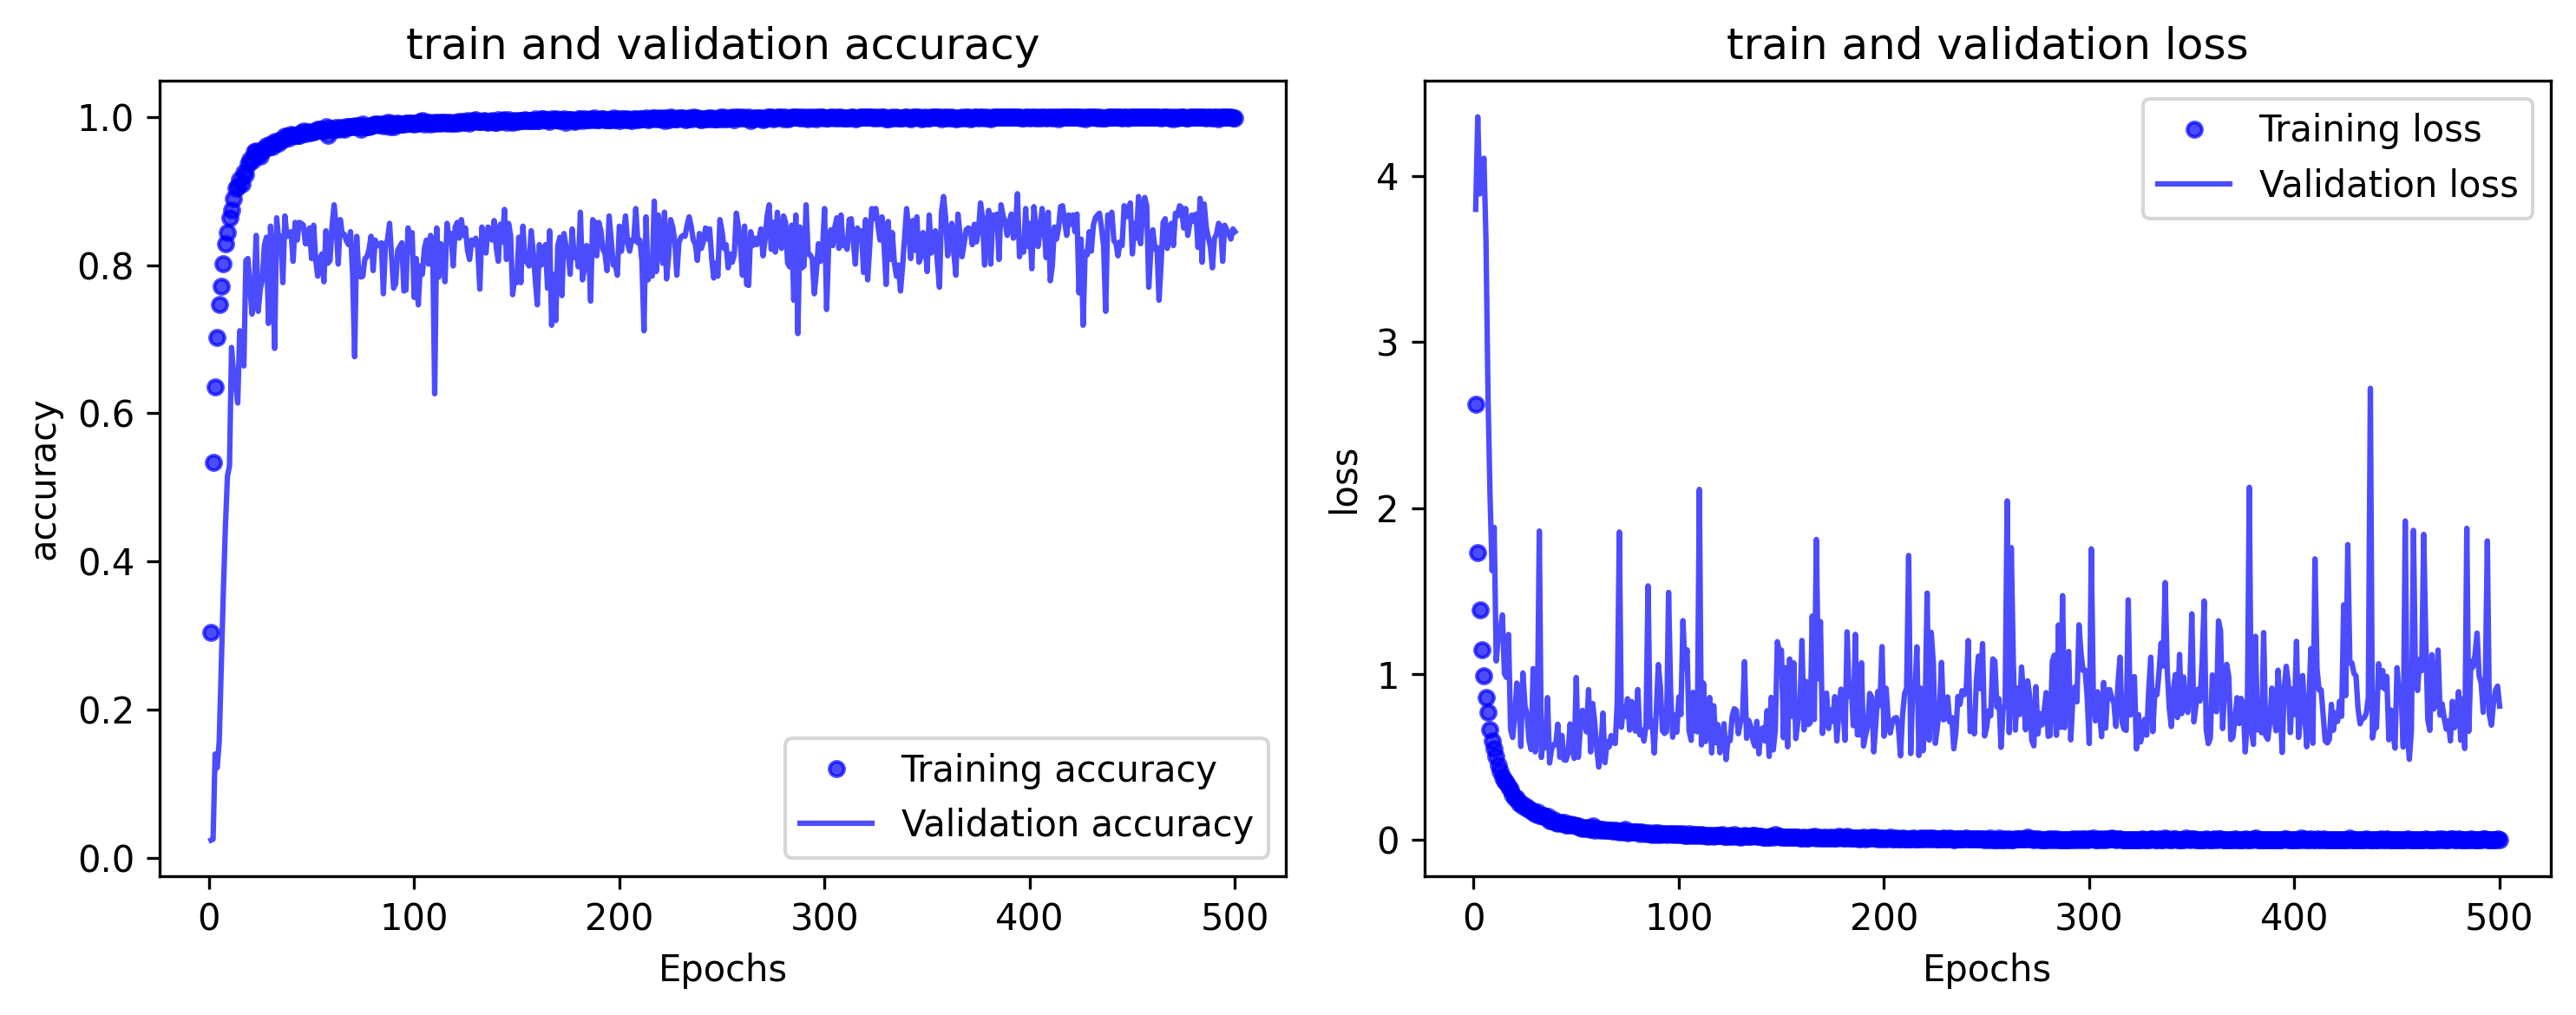

In [68]:
plot_history(history_1)

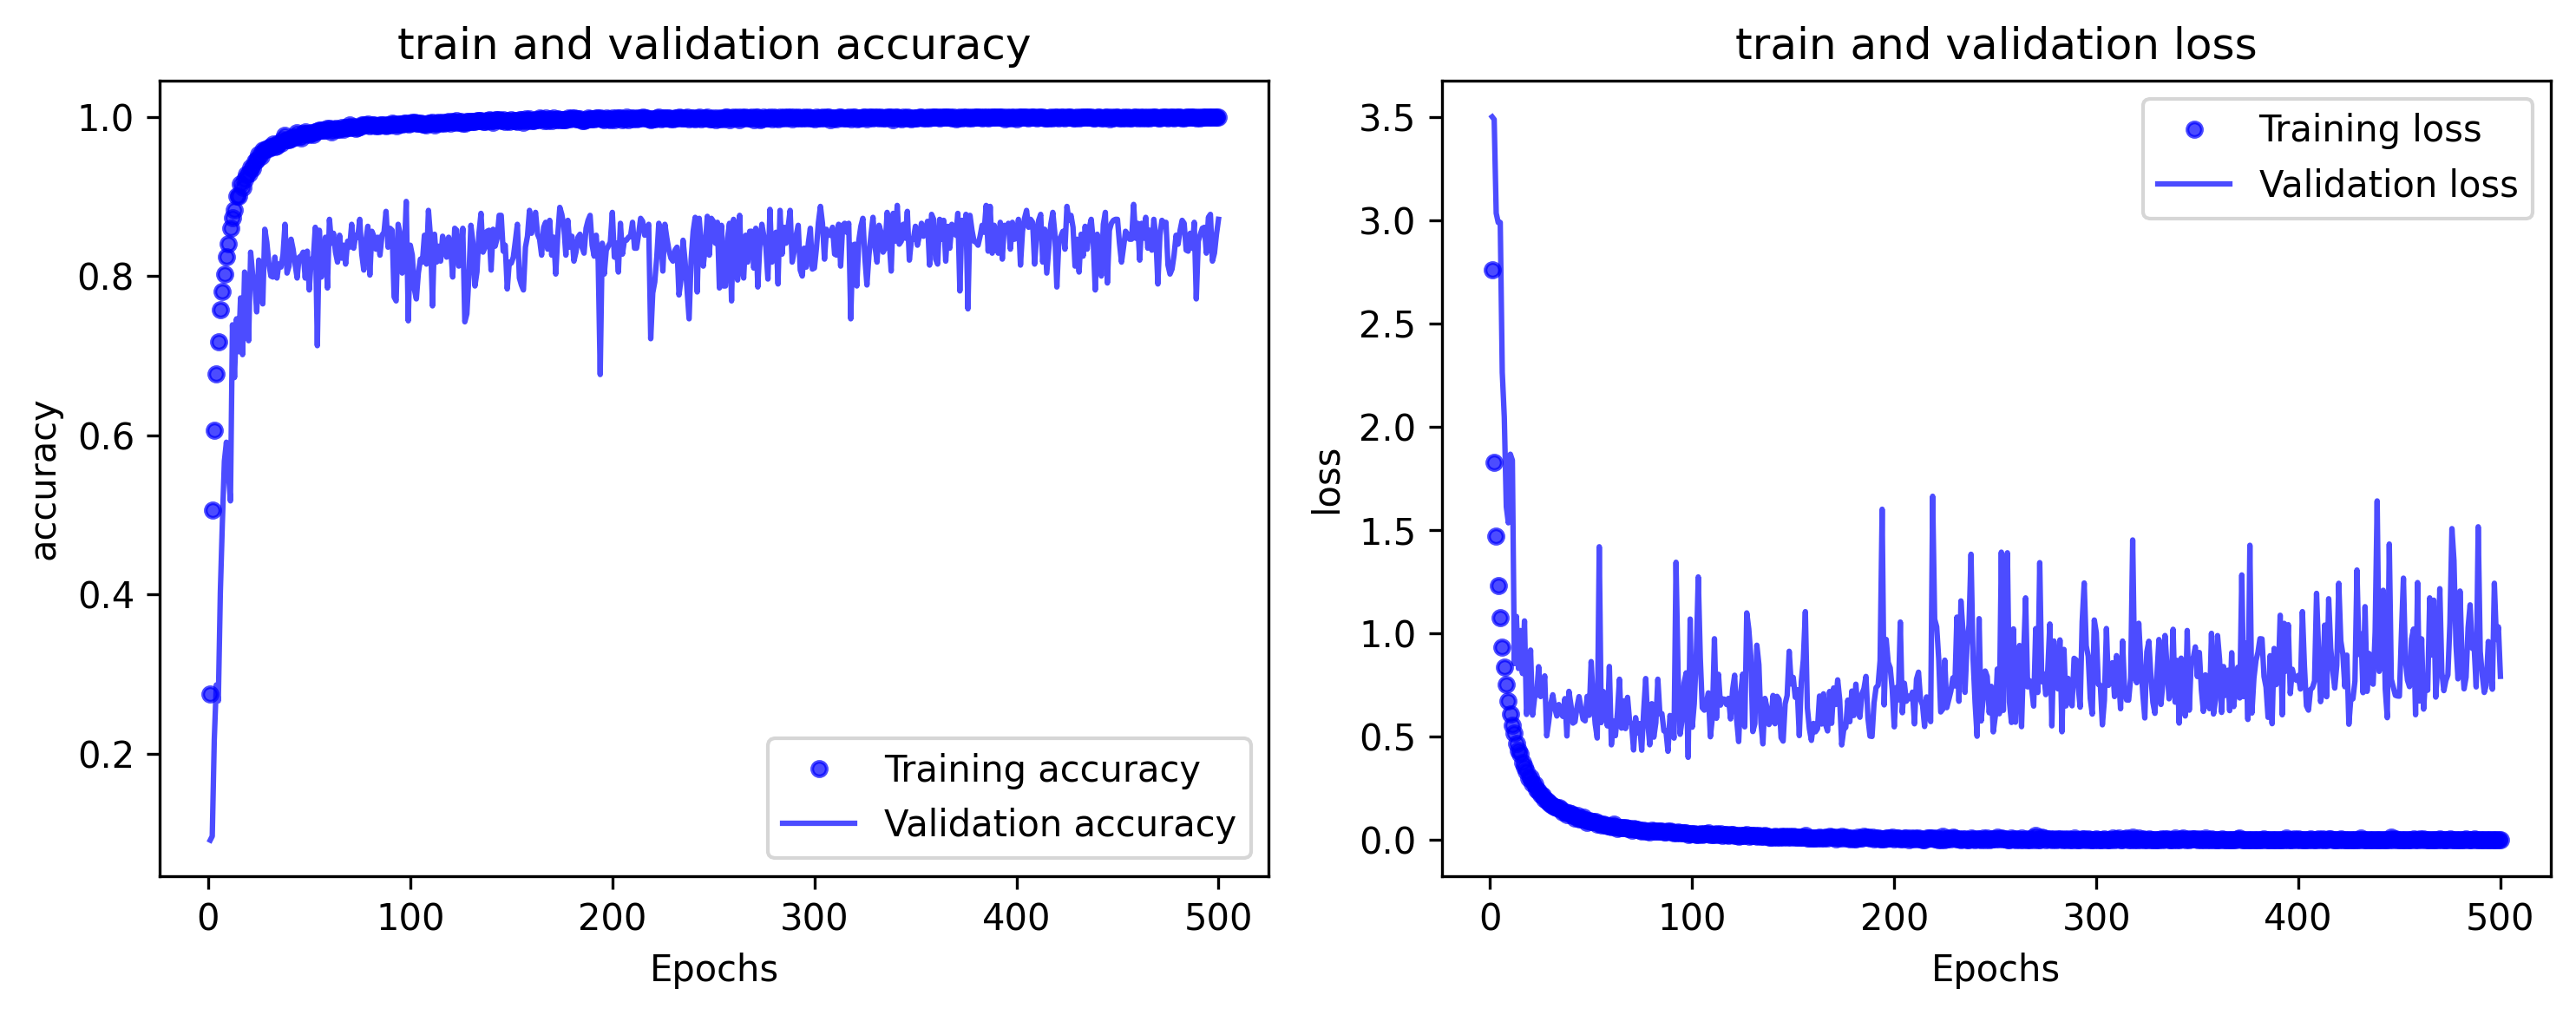

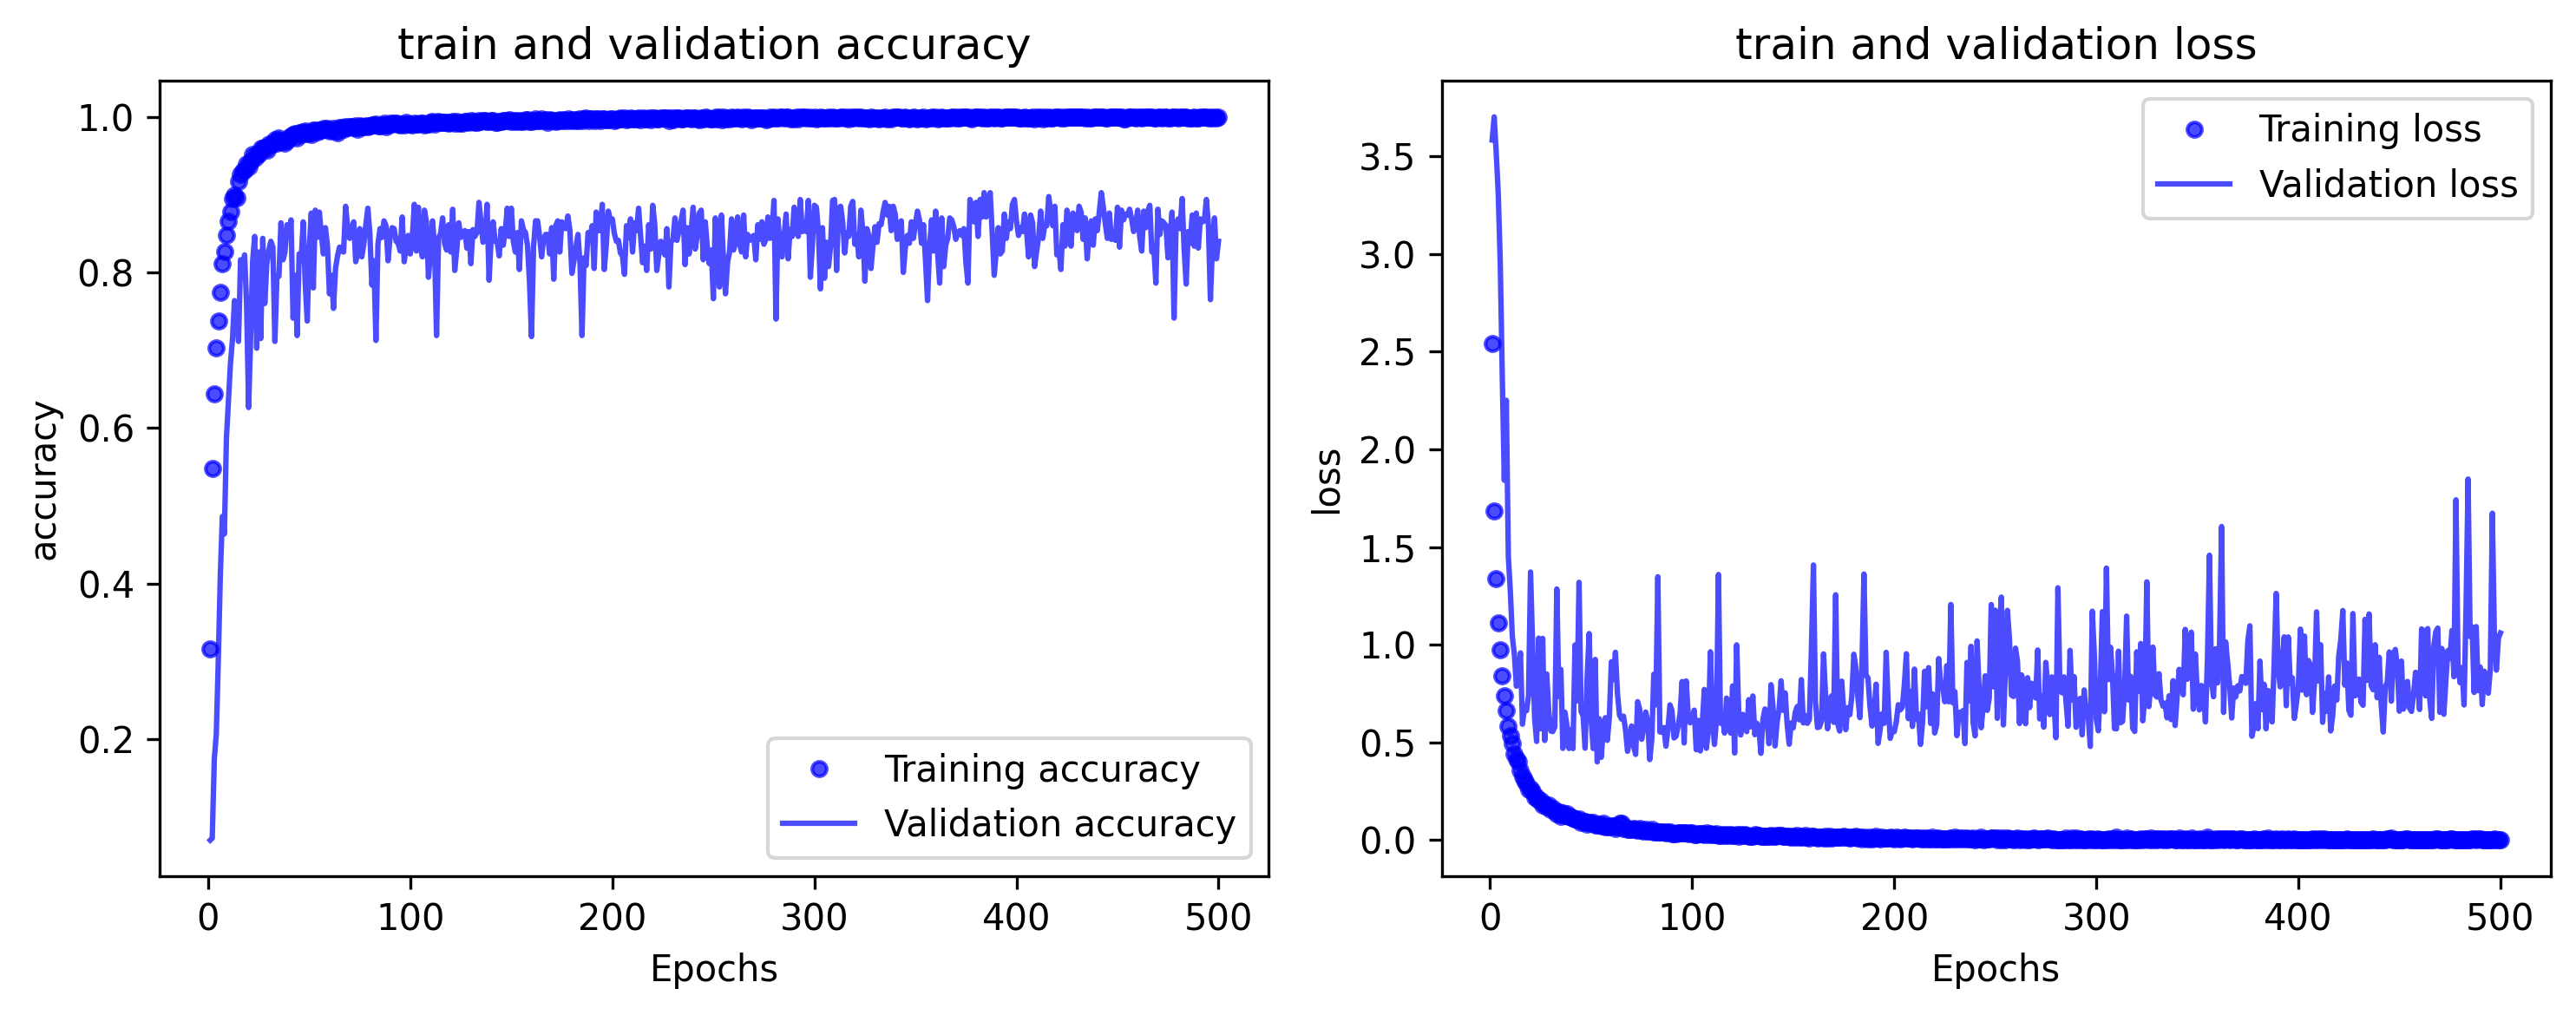

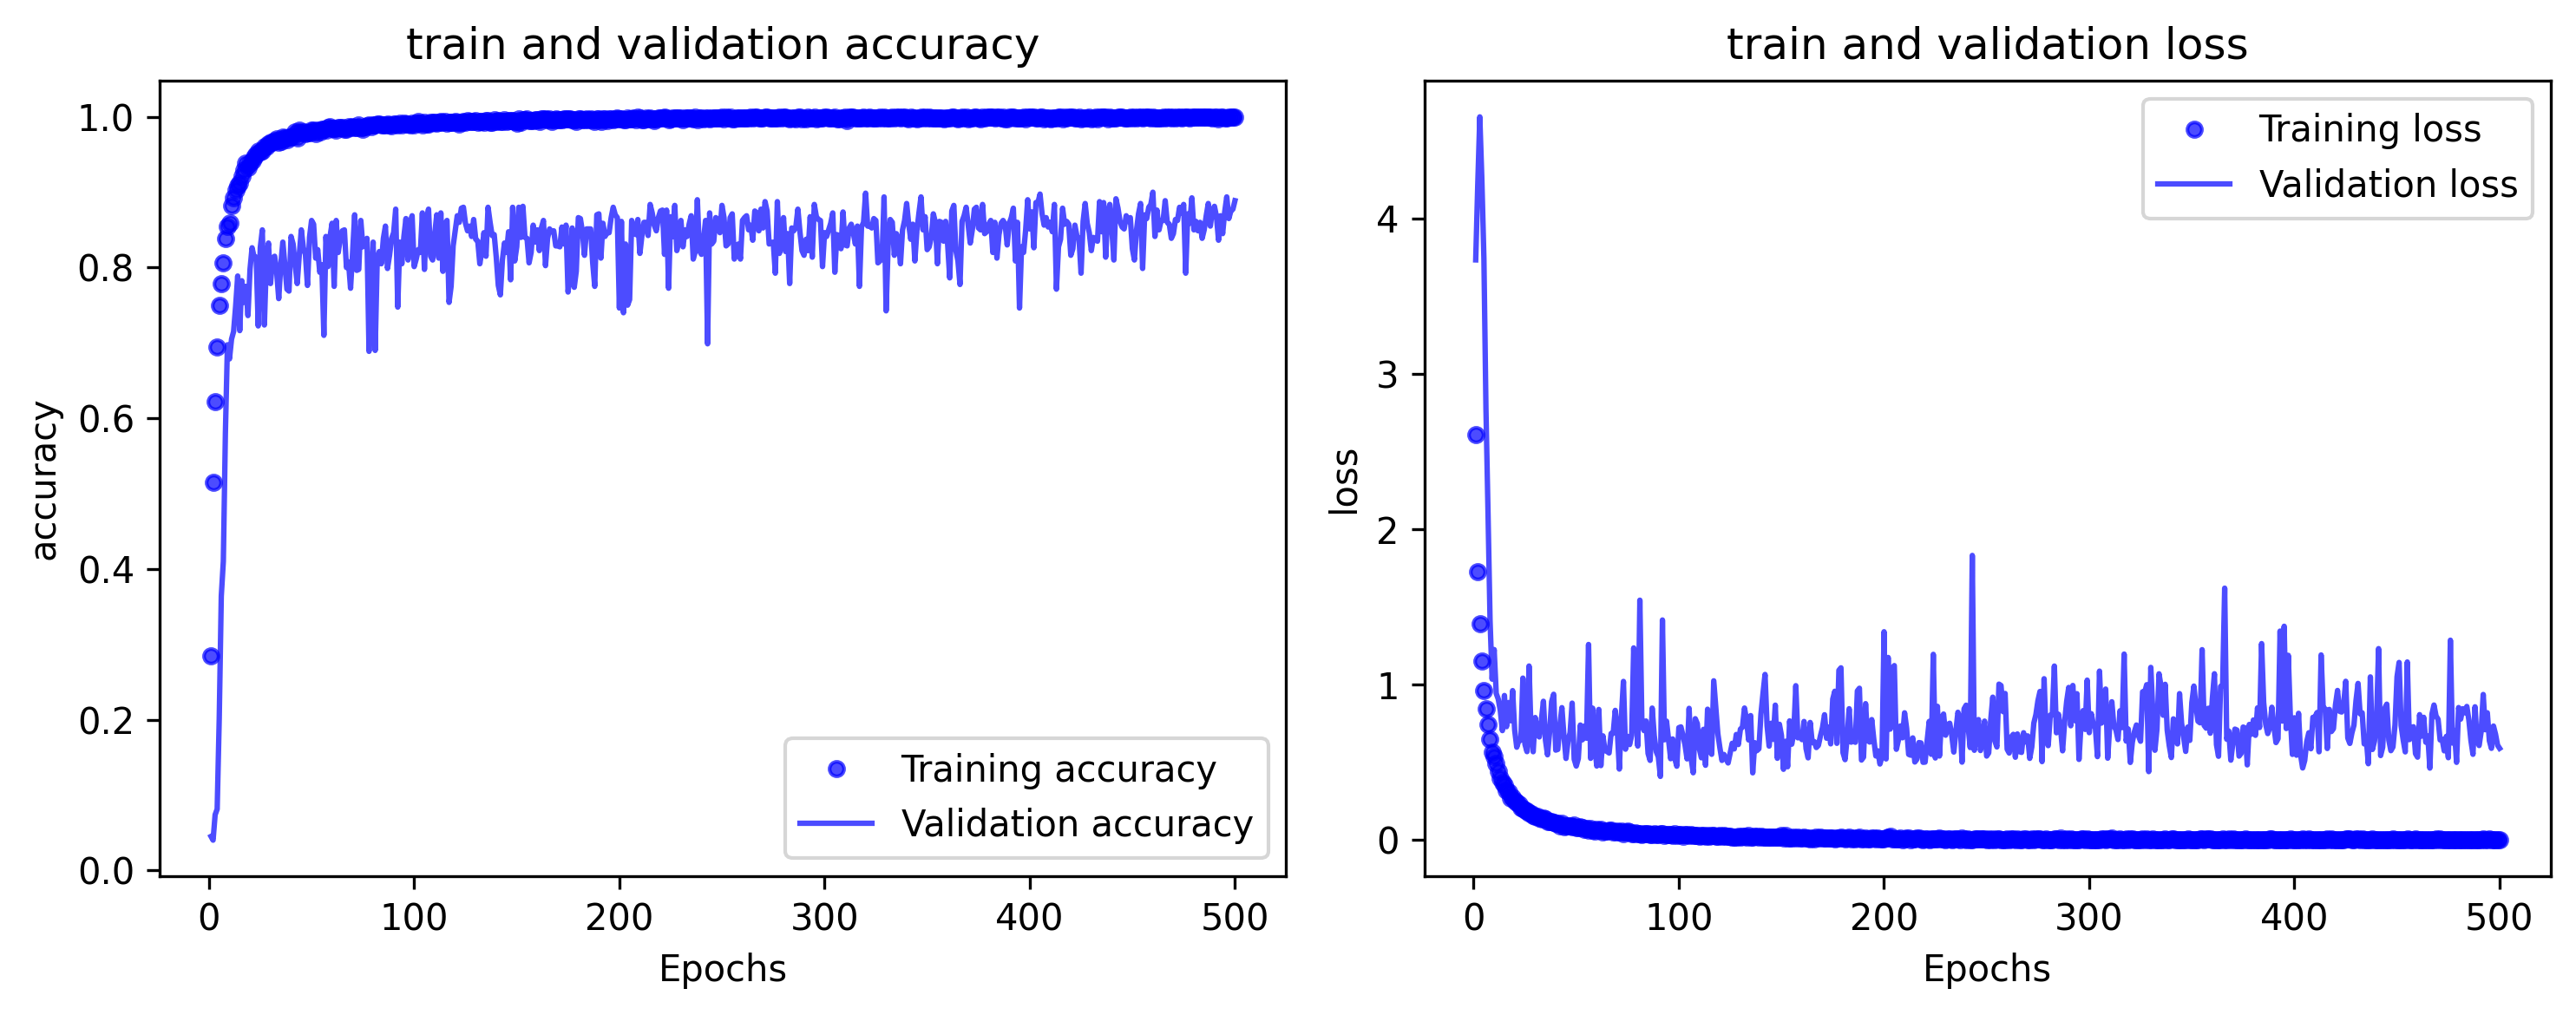

In [86]:
plot_history(history_2)
plot_history(history_3)
plot_history(history_4)

**지수이동평균 계산**

In [0]:
def smooth_curve(points, factor = 0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

In [0]:
import matplotlib.pyplot as plt

c = ['r' ,'g' ,'b' ,'k']

def plot_histories(histories):

    fig = plt.figure(figsize = (10, 4), facecolor = 'white', dpi = 300)

    plt.subplot(1, 2, 1)
    for i, history in enumerate(histories):
        acc = history.history['accuracy']
        val_acc = history.history['val_accuracy']
        plt.plot(np.arange(1, len(val_acc) + 1, 1), 1 - np.array(smooth_curve(val_acc)), color = c[i], label = 'Validation accuracy', alpha = .7)
    plt.title('train and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('accuracy')
    plt.yscale('log')
    plt.legend()

    plt.subplot(1, 2, 2)
    for i, history in enumerate(histories):
        loss = history.history['loss']
        val_loss = history.history['val_loss']
        plt.plot(np.arange(1, len(val_loss) + 1, 1), smooth_curve(val_loss), color = c[i], label = 'Validation loss', alpha = .7)
    plt.xlabel('Epochs')
    plt.ylabel('loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

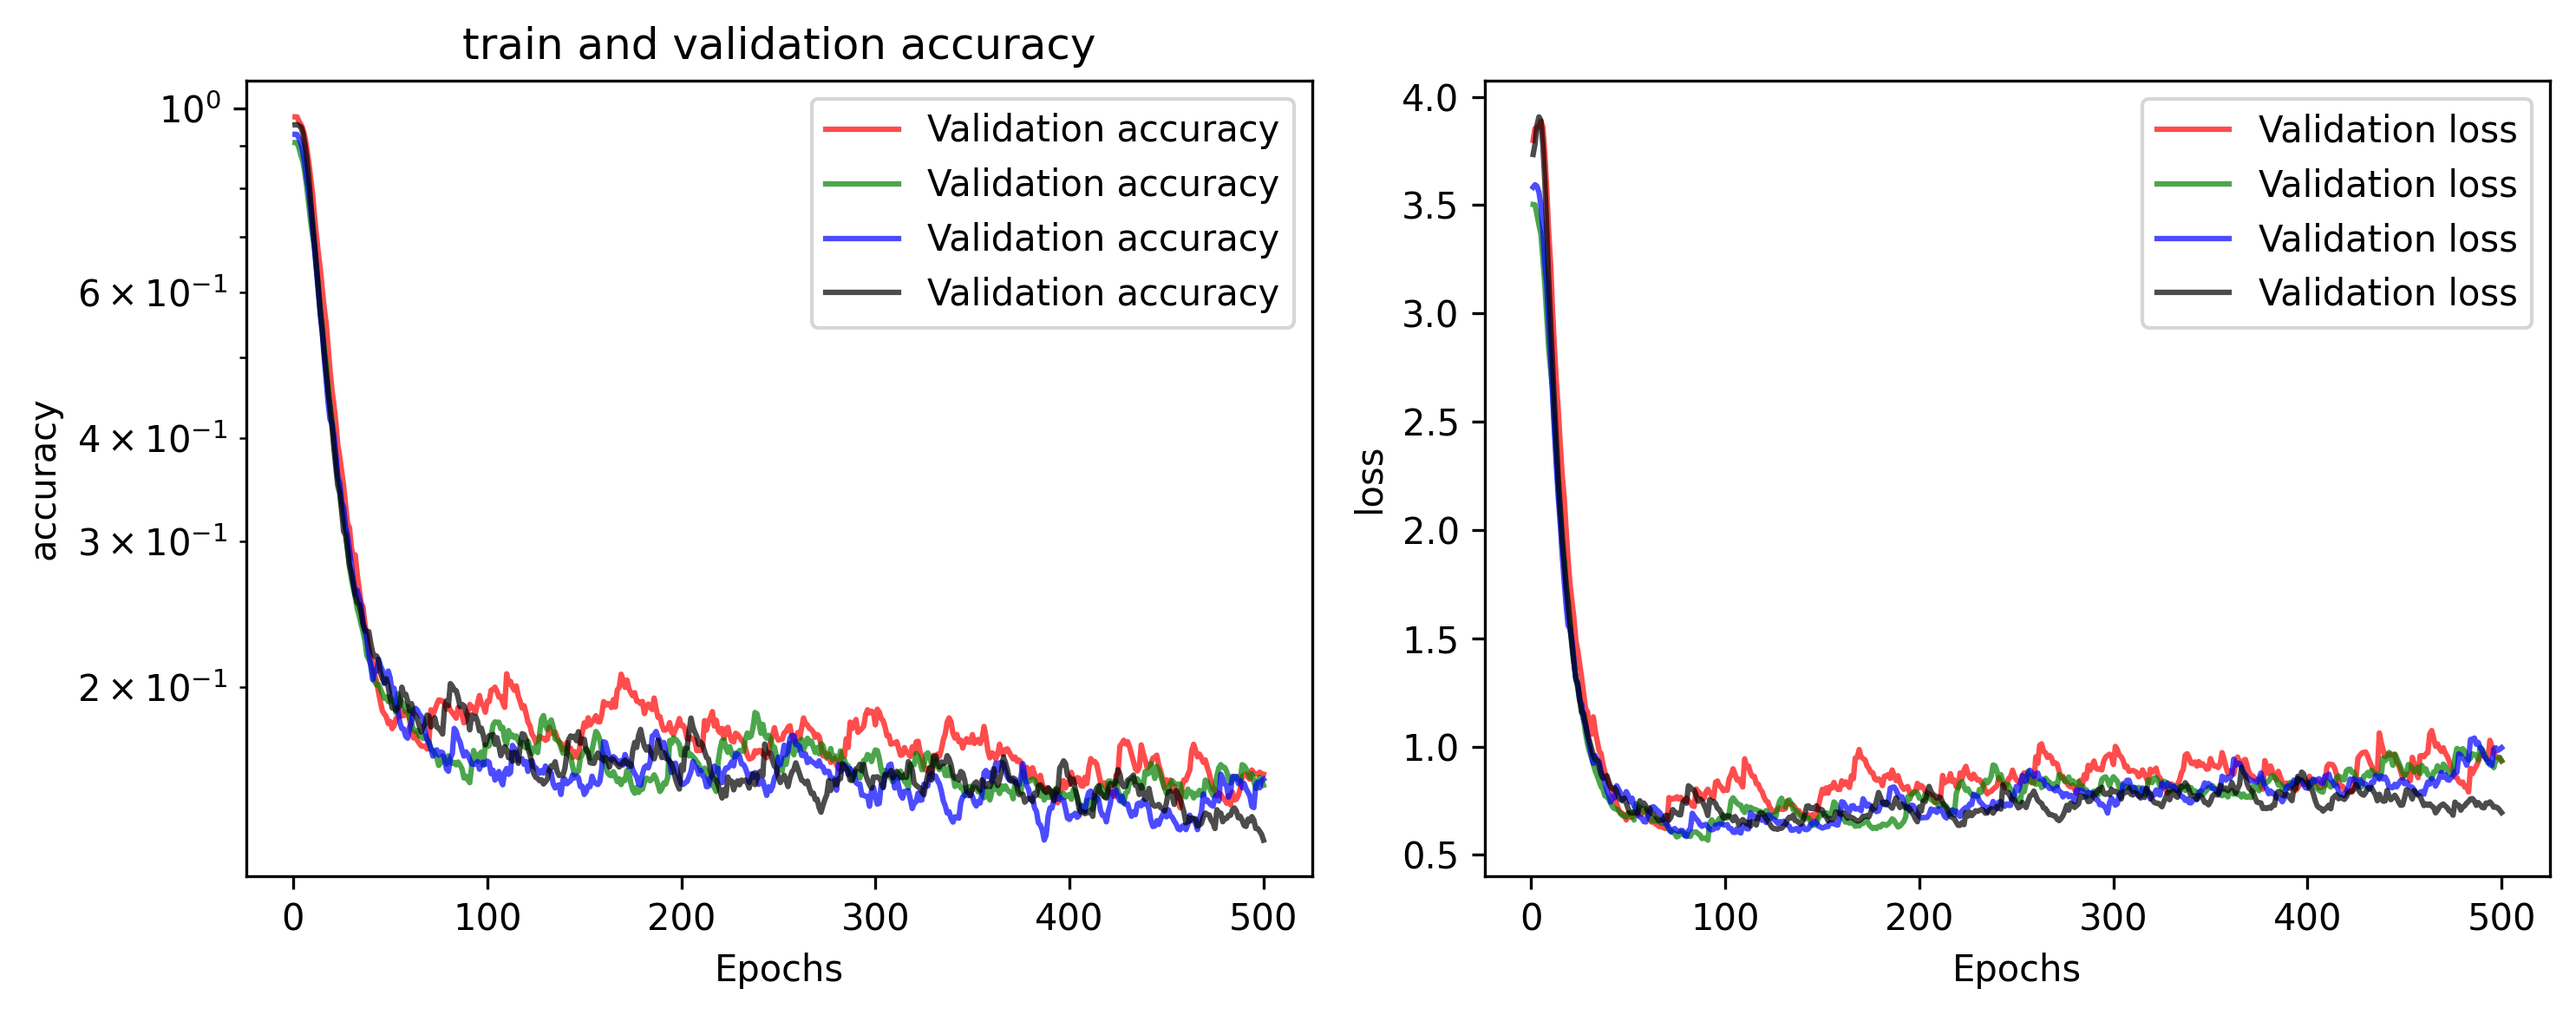

In [108]:
plot_histories([history_1, history_2, history_3, history_4])